In [5]:
!pip install folium


   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   ------- ------------------------------- 20.5/113.4 kB 165.2 kB/s eta 0:00:01
   ------- ------------------------------- 20.5/113.4 kB 165.2 kB/s eta 0:00:01
   ------- ------------------------------- 20.5/113.4 kB 165.2 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/113.4 kB 164.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/113.4 kB 218.8 kB/s eta 0:00:01
   ------------------------ -------------- 71.7/113.4 kB 218.6 kB/s eta 0:00:01
   ------------------------ -------------- 71.7/113.4 kB 218.6 kB/s eta 0:00:01
   ------------------------------- ------- 92.2/113.4 kB 218.5 kB/s eta 0:00:01
   -------------------------------------- 113.4/113.4 kB 254.1 kB/s eta 0:00:00


In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [9]:
# Step 1: Load Dataset
data = pd.read_csv("Task 5 Dataset - Accident.csv")  

C:\Users\hello\AppData\Local\Temp\ipykernel_16820\2896027576.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Task 5 Dataset - Accident.csv")


In [13]:
# Preview dataset
print("Dataset preview:")
display(data.head())


Dataset preview:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012


In [15]:
# Basic info
print("Dataset info:")
data.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         

In [21]:
# Step 2: Handle Missing Values
# Check missing values
print("Missing values:")
print(data.isnull().sum())

# For visualization, we need valid coordinates
data = data.dropna(subset=['Longitude', 'Latitude', 'Time', 'Weather_Conditions', 'Road_Surface_Conditions'])


Missing values:
Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Det

In [23]:
# Step 3: Extract Hour from Time Column
data['Hour'] = data['Time'].str.split(':').str[0].astype(int)

C:\Users\hello\AppData\Local\Temp\ipykernel_16820\778237275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['Time'].str.split(':').str[0].astype(int)


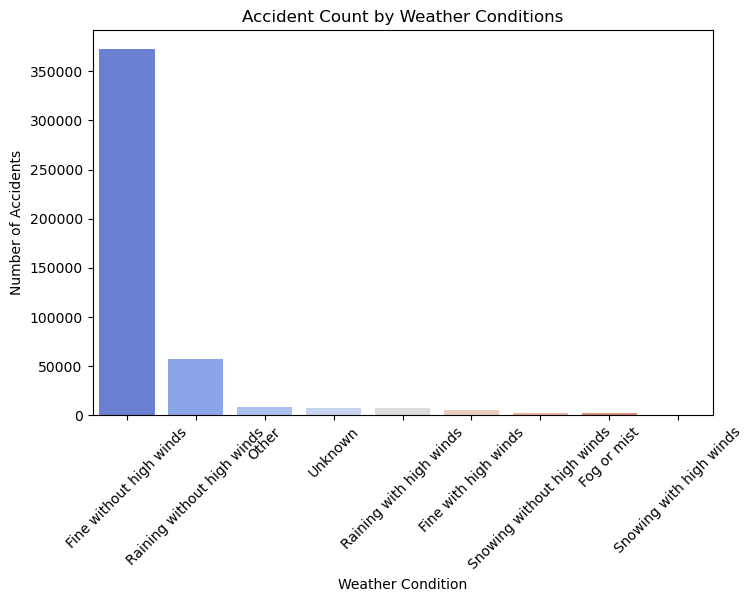

In [25]:
# Step 4: Explore Patterns
# 1. Accident count by weather conditions
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Weather_Conditions', order=data['Weather_Conditions'].value_counts().index, palette='coolwarm')
plt.title("Accident Count by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

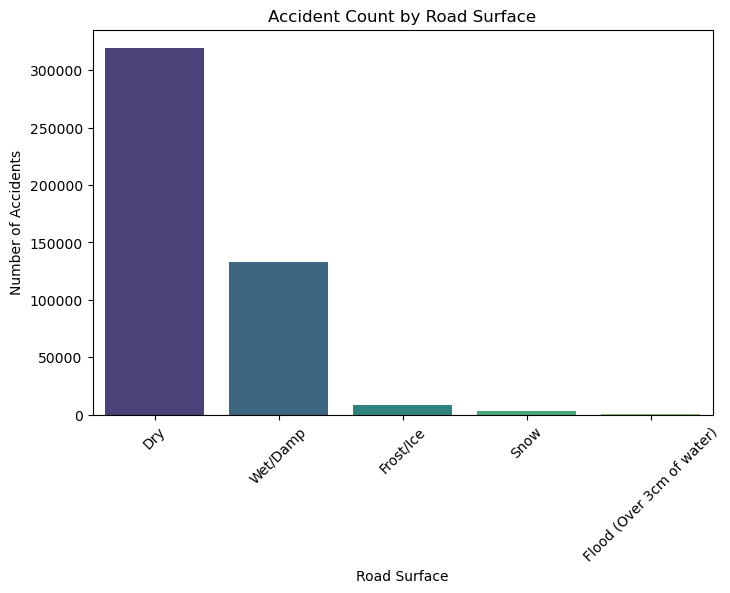

In [29]:
# 2. Accident count by road surface
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Road_Surface_Conditions', order=data['Road_Surface_Conditions'].value_counts().index, palette='viridis')
plt.title("Accident Count by Road Surface")
plt.xlabel("Road Surface")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

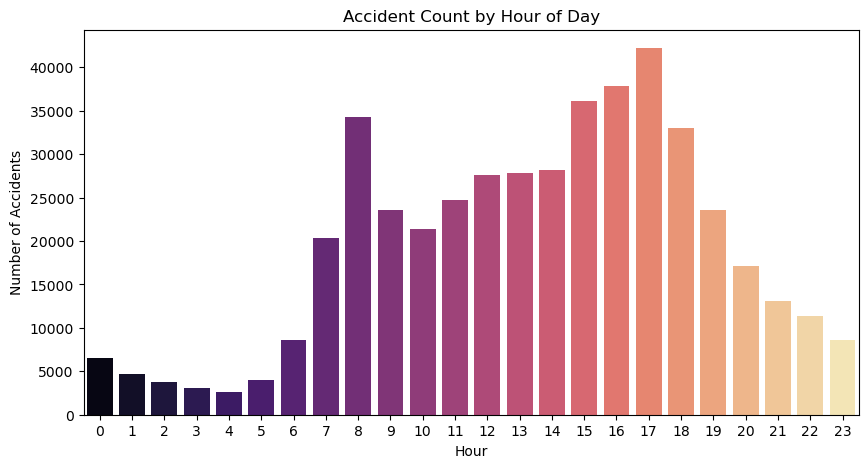

In [31]:
# 3. Accident count by hour of day
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Hour', palette='magma')
plt.title("Accident Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


In [45]:
# Step 5: Accident Hotspots (Using Folium)
# Create a base map centered on UK
uk_map = folium.Map(location=[54.5, -4], zoom_start=5)

# Add heatmap
heat_data = data[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data, radius=8).add_to(uk_map)
map_path = r"C:\Users\hello\Downloads\Prodigy\Accident_Hotspots.html"

# Save the map
uk_map.save(map_path)

# Display clickable link in Jupyter Notebook
display(HTML(f'<a href="{map_path}" target="_blank">Click here to open Accident Hotspots Map</a>'))

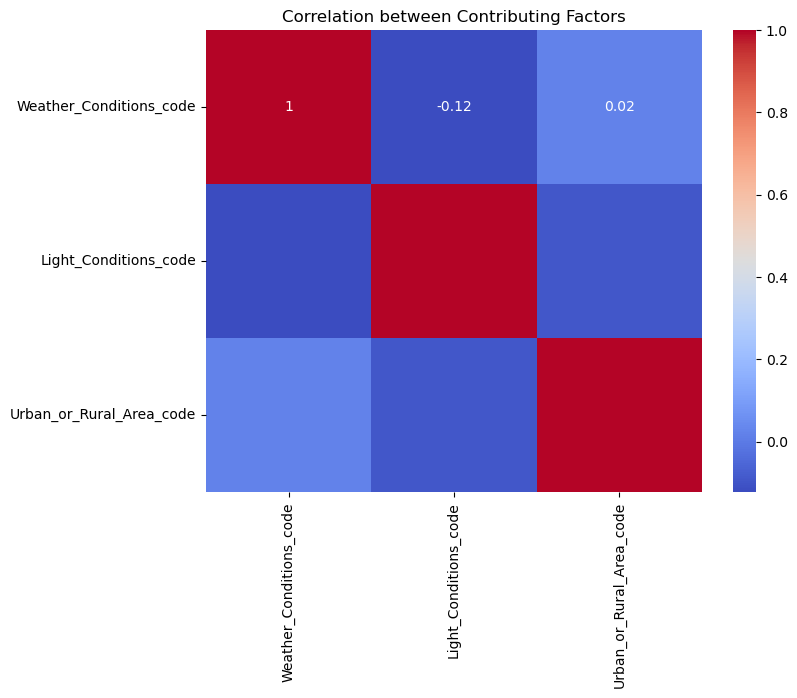

In [47]:
# Step 6: Correlation / Contributing Factors

# Convert categorical columns to numeric codes for correlation
cat_cols = ['Weather_Conditions', 'Road_Surface', 'Light_Conditions', 'Urban_or_Rural_Area']
for col in cat_cols:
    if col in data.columns:
        data[col+'_code'] = data[col].astype('category').cat.codes

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[[col+'_code' for col in cat_cols if col+'_code' in data.columns]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Contributing Factors")
plt.show()